In [1]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
    centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
    centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [3]:
def lable_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y


In [4]:
y_train = lable_map(y_train, [0,1], 0)
y_train = lable_map(y_train, [2,3], 1)
y_test = lable_map(y_test, [0,1], 0)
y_test = lable_map(y_test, [2,3], 1)

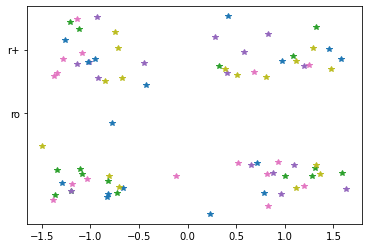

In [5]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
        
    for x_, y_ in zip(x,y):
        if y_ is None: 
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', 
                     markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], '*', c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()


In [6]:
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)

In [7]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [8]:
model = NeuralNet(2, 5)
# input_size = 2, hidden_size = 5 
learning_rate = 0.03
criterion = torch.nn.BCELoss()

epochs = 2000

In [9]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7120137214660645


In [11]:
for epoch in range(epochs) :
    model.train()
    optimizer.zero_grad()

    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)

    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
      
        train_loss.backward()
        optimizer.step()


Train loss at 0 is 0.7103143334388733
Train loss at 100 is 0.7092715501785278
Train loss at 200 is 0.7082367539405823
Train loss at 300 is 0.7072098255157471
Train loss at 400 is 0.7061907052993774
Train loss at 500 is 0.7051790952682495
Train loss at 600 is 0.7041749954223633
Train loss at 700 is 0.7031782269477844
Train loss at 800 is 0.7021887898445129
Train loss at 900 is 0.701206386089325
Train loss at 1000 is 0.7002310156822205
Train loss at 1100 is 0.6992626786231995
Train loss at 1200 is 0.6983009576797485
Train loss at 1300 is 0.6973460912704468
Train loss at 1400 is 0.6963975429534912
Train loss at 1500 is 0.6954535245895386
Train loss at 1600 is 0.694516122341156
Train loss at 1700 is 0.6935849785804749
Train loss at 1800 is 0.6926600933074951
Train loss at 1900 is 0.691741943359375


In [12]:
model.eval()
test_loss_before = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss_before.item()))

After Training, test loss is 0.6916103363037109


In [13]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-0.5896,  0.6081],
        [-0.5261,  0.6279],
        [ 0.3890,  0.1347],
        [ 0.4378, -0.1856],
        [ 0.1364,  0.2686]])), ('linear_1.bias', tensor([-0.1978,  0.0023, -0.5332, -0.1508, -0.1458])), ('linear_2.weight', tensor([[ 0.4922, -0.2752,  0.0995, -0.1119,  0.3590]])), ('linear_2.bias', tensor([0.1494]))])


In [14]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>

In [15]:
new_model.eval()
print('vector [-1,1] 레이블이 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

vector [-1,1] 레이블이 1을 가질 확률은 0.580156147480011
